In [1]:
import os
os.chdir('./data')

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Data Imports (Core datasets)

In [83]:
kyoto = pd.read_csv('kyoto.csv')

In [84]:
kyoto.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,kyoto,35.011983,135.676114,44,812,0812-04-01,92
1,kyoto,35.011983,135.676114,44,815,0815-04-15,105
2,kyoto,35.011983,135.676114,44,831,0831-04-06,96
3,kyoto,35.011983,135.676114,44,851,0851-04-18,108
4,kyoto,35.011983,135.676114,44,853,0853-04-14,104


In [85]:
kyoto = kyoto.query('year > 1950').reset_index(drop = True)

In [100]:
# I am also interested in the change
kyoto['change'] = kyoto.bloom_doy.pct_change(1).fillna(0)
kyoto['diff'] = kyoto.bloom_doy.diff(1).fillna(0)

In [101]:
kyoto.head()

,location,lat,long,alt,year,bloom_date,bloom_doy,change,diff
0,kyoto,35.011983,135.676114,44,1951,1951-04-08,98,0.000000,0.0
1,kyoto,35.011983,135.676114,44,1952,1952-04-14,105,0.071429,7.0
2,kyoto,35.011983,135.676114,44,1953,1953-04-11,101,-0.038095,-4.0
3,kyoto,35.011983,135.676114,44,1954,1954-04-08,98,-0.029703,-3.0
4,kyoto,35.011983,135.676114,44,1955,1955-04-07,97,-0.010204,-1.0


In [89]:
liestal = pd.read_csv('liestal.csv')

In [90]:
liestal.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,liestal,47.4814,7.730519,350,1894,1894-04-16,106
1,liestal,47.4814,7.730519,350,1895,1895-04-17,107
2,liestal,47.4814,7.730519,350,1896,1896-04-16,107
3,liestal,47.4814,7.730519,350,1897,1897-03-27,86
4,liestal,47.4814,7.730519,350,1898,1898-04-16,106


In [102]:
liestal = liestal.query('year>1950').reset_index(drop = True)
# I am also interested in the change
liestal['change'] = liestal.bloom_doy.pct_change(1).fillna(0)
liestal['diff'] = liestal.bloom_doy.diff(1).fillna(0)

In [92]:
dc = pd.read_csv('washingtondc.csv')

In [93]:
dc.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,washingtondc,38.88535,-77.038628,0,1921,1921-03-20,79
1,washingtondc,38.88535,-77.038628,0,1922,1922-04-07,97
2,washingtondc,38.88535,-77.038628,0,1923,1923-04-09,99
3,washingtondc,38.88535,-77.038628,0,1924,1924-04-13,104
4,washingtondc,38.88535,-77.038628,0,1925,1925-03-27,86


In [103]:
dc = dc.query('year>1950').reset_index(drop = True)
# I am also interested in the change
dc['change'] = dc.bloom_doy.pct_change(1).fillna(0)
dc['diff'] = dc.bloom_doy.diff(1).fillna(0)

<AxesSubplot:xlabel='year'>

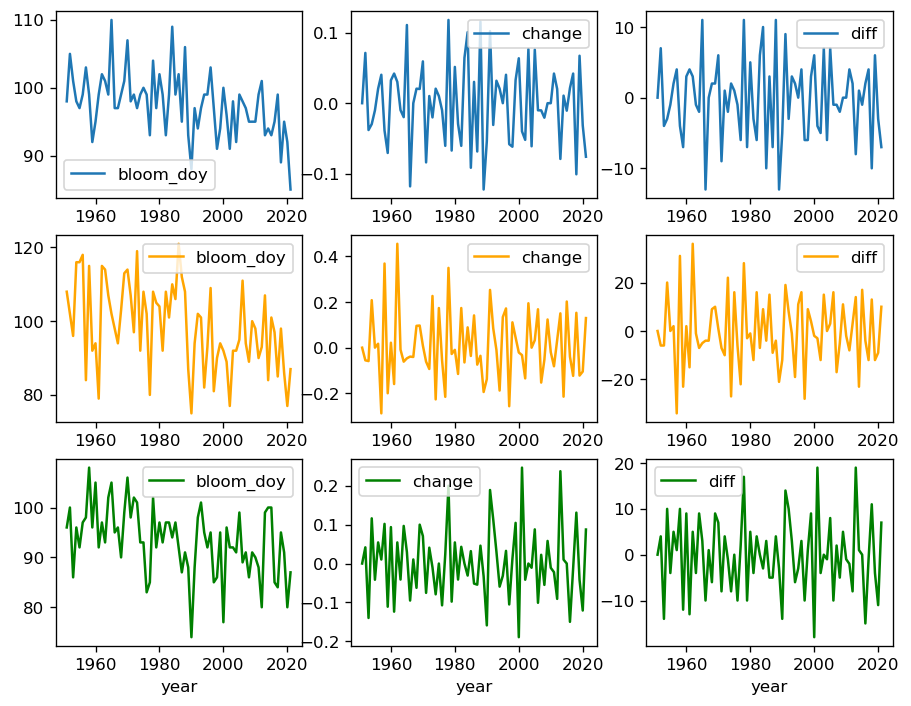

In [104]:
fig, axes = plt.subplots(3, 3)
kyoto.loc[:, ['year','bloom_doy']].plot.line(x = 'year', y = 'bloom_doy', ax = axes[0, 0])
liestal.loc[:, ['year','bloom_doy']].plot.line(x = 'year', y = 'bloom_doy', ax = axes[1, 0], color = 'orange')
dc.loc[:, ['year','bloom_doy']].plot.line(x = 'year', y = 'bloom_doy', ax = axes[2, 0], color = 'green')
# change
kyoto.loc[:, ['year','change']].plot.line(x = 'year', y = 'change', ax = axes[0, 1])
liestal.loc[:, ['year','change']].plot.line(x = 'year', y = 'change', ax = axes[1, 1], color = 'orange')
dc.loc[:, ['year','change']].plot.line(x = 'year', y = 'change', ax = axes[2, 1], color = 'green')
# diff
kyoto.loc[:, ['year','diff']].plot.line(x = 'year', y = 'diff', ax = axes[0, 2])
liestal.loc[:, ['year','diff']].plot.line(x = 'year', y = 'diff', ax = axes[1, 2], color = 'orange')
dc.loc[:, ['year','diff']].plot.line(x = 'year', y = 'diff', ax = axes[2, 2], color = 'green')


# Model 1: ARIMA Models for each of them

In [74]:
from statsmodels.tsa.stattools import adfuller

In [110]:
result = adfuller(kyoto.bloom_doy)
print(f'p-value : {result[1].round(5)}' )
result = adfuller(kyoto['diff'])
print(f'p-value : {result[1].round(5)}' )
result = adfuller(kyoto.change)
print(f'p-value : {result[1].round(5)}' )

p-value : 0.0
p-value : 0.0
p-value : 1e-05


In [111]:
result = adfuller(liestal.bloom_doy)
print(f'p-value : {result[1].round(5)}' )
result = adfuller(liestal['diff'])
print(f'p-value : {result[1].round(5)}' )
result = adfuller(liestal.change)
print(f'p-value : {result[1].round(5)}' )

p-value : 0.0
p-value : 0.0
p-value : 0.0


In [112]:
result = adfuller(dc.bloom_doy)
print(f'p-value : {result[1].round(5)}' )
result = adfuller(dc['diff'])
print(f'p-value : {result[1].round(5)}' )
result = adfuller(dc.change)
print(f'p-value : {result[1].round(5)}' )

p-value : 0.0
p-value : 3e-05
p-value : 3e-05


#### Finding 1: The ADF test indicates that all of the time series are stationary
=> We will move forward to find p and q for the ARIMA model

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


#### Bloom Day

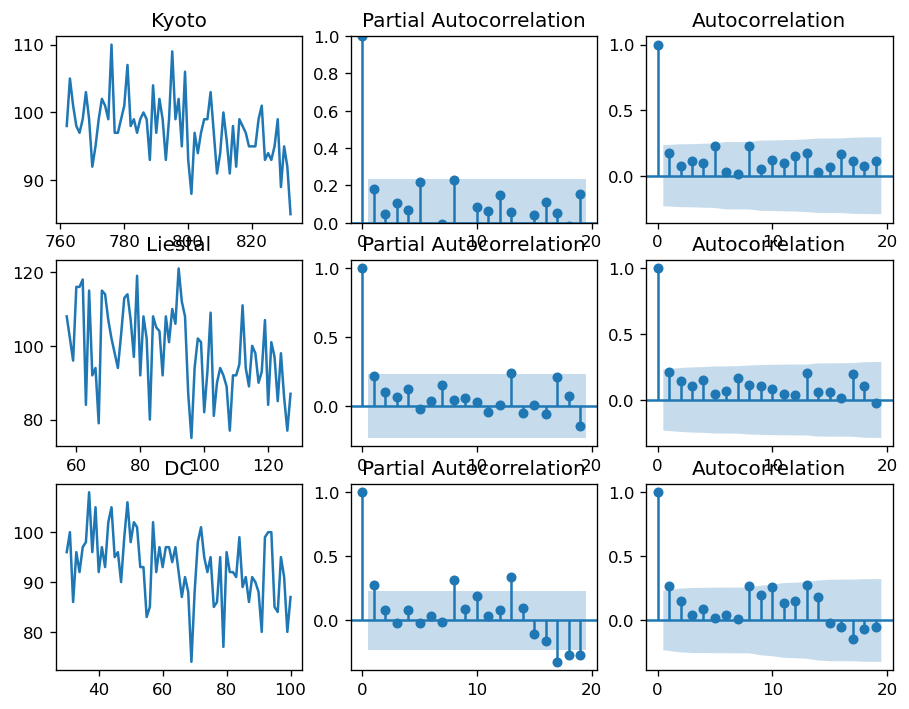

In [79]:
fig, axes = plt.subplots(3, 3)

# Kyoto
axes[0, 0].plot(kyoto.bloom_doy)
axes[0, 0].set_title('Kyoto')
axes[0, 1].set(ylim=(0,1))
plot_pacf(kyoto.bloom_doy, ax=axes[0, 1]);
plot_acf(kyoto.bloom_doy, ax=axes[0, 2]);
#Liestal
axes[1, 0].plot(liestal.bloom_doy)
axes[1, 0].set_title('Liestal')
axes[0, 1].set(ylim=(0,1))
plot_pacf(liestal.bloom_doy, ax=axes[1, 1]);
plot_acf(liestal.bloom_doy, ax=axes[1, 2]);

#DC
axes[2, 0].plot(dc.bloom_doy)
axes[2, 0].set_title('DC')
axes[0, 1].set(ylim=(0,1))
plot_pacf(dc.bloom_doy, ax=axes[2, 1]);
plot_acf(dc.bloom_doy, ax=axes[2, 2]);



This is quite ambiguous, because for Tokyo and Liestal, it may make sense to set p = 1, while for DC, setting p = 1 would be little controversial; However, to make all of them consistent, I will set p = 1. The same goes for the q parameter; we will set q as 1

### Differences

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


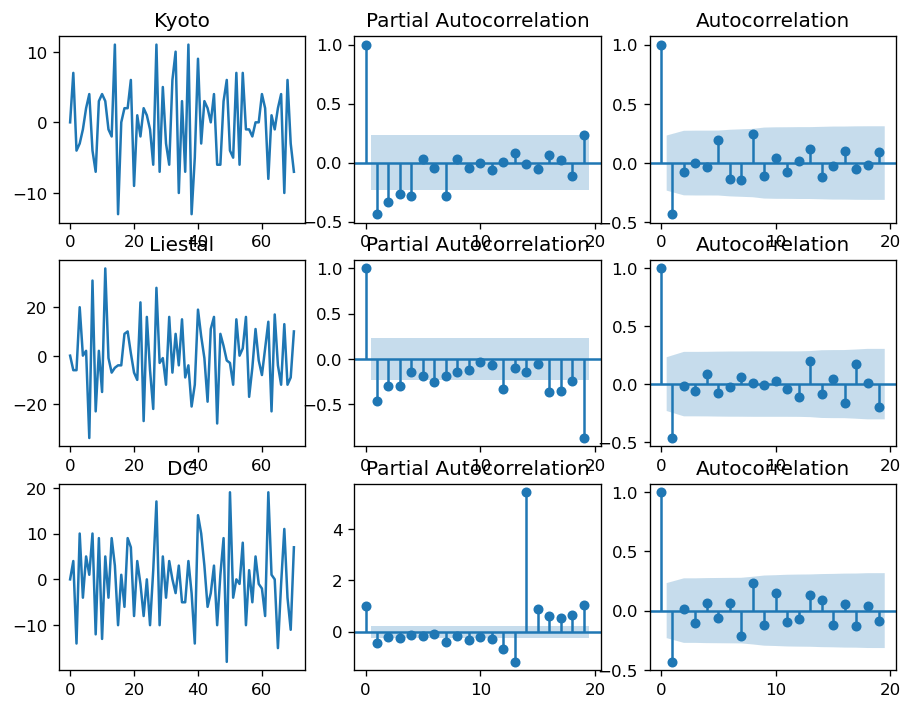

In [114]:
fig, axes = plt.subplots(3, 3)

# Kyoto
axes[0, 0].plot(kyoto['diff'])
axes[0, 0].set_title('Kyoto')
plot_pacf(kyoto['diff'], ax=axes[0, 1]);
plot_acf(kyoto['diff'], ax=axes[0, 2]);
#Liestal
axes[1, 0].plot(liestal['diff'])
axes[1, 0].set_title('Liestal')
plot_pacf(liestal['diff'], ax=axes[1, 1]);
plot_acf(liestal['diff'], ax=axes[1, 2]);

#DC
axes[2, 0].plot(dc['diff'])
axes[2, 0].set_title('DC')
plot_pacf(dc['diff'], ax=axes[2, 1]);
plot_acf(dc['diff'], ax=axes[2, 2]);


We may set p = 2, and q = 2 as well when it comes to the time series model on differences

### Change

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


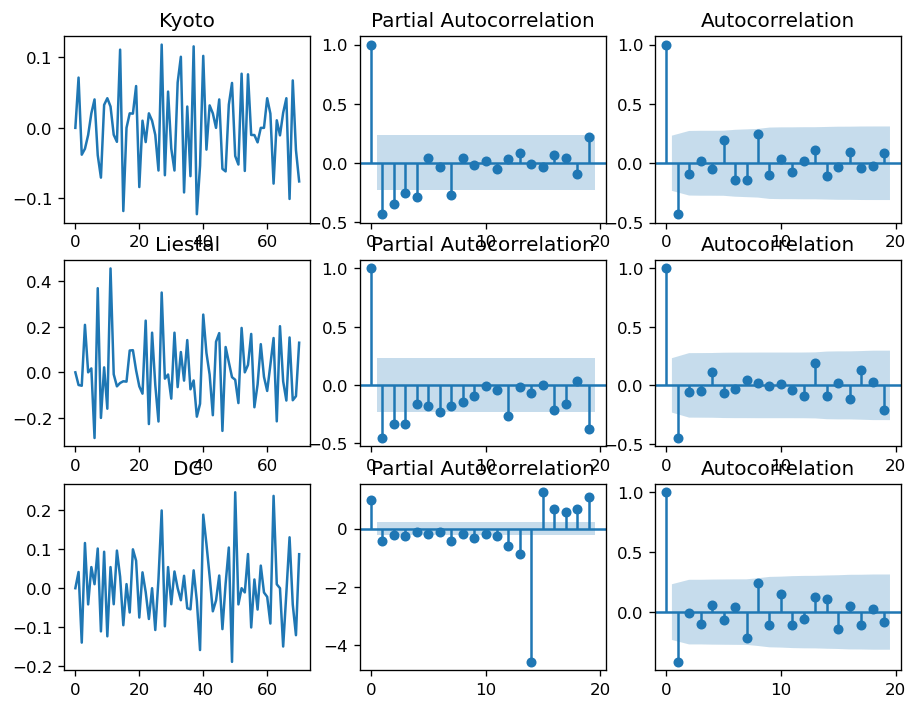

In [115]:
fig, axes = plt.subplots(3, 3)

# Kyoto
axes[0, 0].plot(kyoto['change'])
axes[0, 0].set_title('Kyoto')
plot_pacf(kyoto['change'], ax=axes[0, 1]);
plot_acf(kyoto['change'], ax=axes[0, 2]);
#Liestal
axes[1, 0].plot(liestal['change'])
axes[1, 0].set_title('Liestal')
plot_pacf(liestal['change'], ax=axes[1, 1]);
plot_acf(liestal['change'], ax=axes[1, 2]);

#DC
axes[2, 0].plot(dc['change'])
axes[2, 0].set_title('DC')
plot_pacf(dc['change'], ax=axes[2, 1]);
plot_acf(dc['change'], ax=axes[2, 2]);


p = 3, q = 2?

## Fitting ARIMA

### Bloom DOY : ARIMA (1, 0, 1)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [124]:
model1 = ARIMA(kyoto.bloom_doy, order=(1,0,1))
model_fit = model1.fit()
print(model_fit.summary())
model2 = ARIMA(liestal.bloom_doy, order=(1,0,0))
model_fit2 = model2.fit()
print(model_fit2.summary())
model3 = ARIMA(dc.bloom_doy, order=(1,0,1))
model_fit3 = model3.fit()
print(model_fit3.summary())

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:              bloom_doy   No. Observations:                   71
Model:                     ARMA(1, 1)   Log Likelihood                -204.253
Method:                       css-mle   S.D. of innovations              4.278
Date:                Sat, 19 Feb 2022   AIC                            416.507
Time:                        15:00:50   BIC                            425.557
Sample:                             0   HQIC                           420.106
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              97.1437      1.874     51.826      0.000      93.470     100.818
ar.L1.bloom_doy     0.9757      0.035     28.081      0.000       0.908       1.044
ma.L1.bloom_doy    -0.8776      

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.

Text(0.5, 1.0, 'DC')

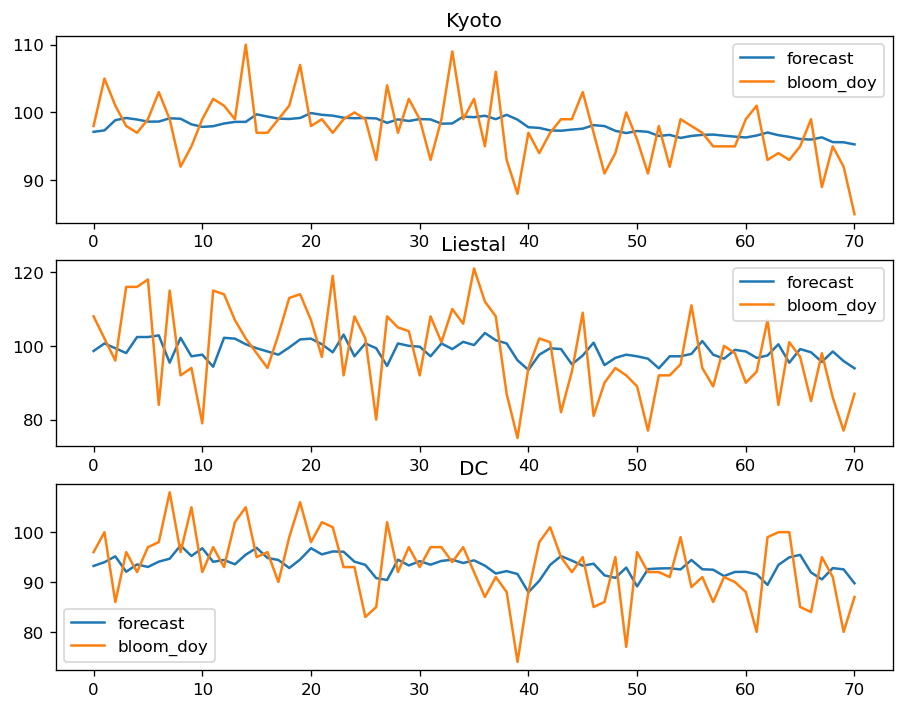

In [125]:
fig, axes = plt.subplots(3, 1)

model_fit.plot_predict(dynamic=False, ax=axes[0]);
model_fit2.plot_predict(dynamic=False, ax=axes[1]);
model_fit3.plot_predict(dynamic=False, ax=axes[2]);
axes[0].set_title('Kyoto')
axes[1].set_title('Liestal')
axes[2].set_title('DC')

### DIFF : ARIMA (2, 0, 2)

In [116]:
model1 = ARIMA(kyoto['diff'], order=(2,0,2))
model_fit = model1.fit()
print(model_fit.summary())
model2 = ARIMA(liestal['diff'], order=(2,0,2))
model_fit2 = model2.fit()
print(model_fit2.summary())
model3 = ARIMA(dc['diff'], order=(2,0,2))
model_fit3 = model3.fit()
print(model_fit3.summary())

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                   71
Model:                     ARMA(2, 2)   Log Likelihood                -201.784
Method:                       css-mle   S.D. of innovations              4.024
Date:                Sat, 19 Feb 2022   AIC                            415.568
Time:                        14:56:37   BIC                            429.144
Sample:                             0   HQIC                           420.966
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0955      0.022     -4.326      0.000      -0.139      -0.052
ar.L1.diff    -0.5398      0.616     -0.876      0.381      -1.748       0.668
ar.L2.diff    -0.0777      0.135     -0.576      0.5

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_param

                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                   71
Model:                     ARMA(2, 2)   Log Likelihood                -267.951
Method:                       css-mle   S.D. of innovations             10.236
Date:                Sat, 19 Feb 2022   AIC                            547.902
Time:                        14:56:37   BIC                            561.478
Sample:                             0   HQIC                           553.300
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2417      0.063     -3.861      0.000      -0.364      -0.119
ar.L1.diff    -0.6359      0.763     -0.833      0.405      -2.132       0.860
ar.L2.diff     0.0673      0.121      0.557      0.5

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_param

                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                   71
Model:                     ARMA(2, 2)   Log Likelihood                -229.938
Method:                       css-mle   S.D. of innovations              5.995
Date:                Sat, 19 Feb 2022   AIC                            471.876
Time:                        14:56:38   BIC                            485.452
Sample:                             0   HQIC                           477.275
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1360      0.041     -3.308      0.001      -0.217      -0.055
ar.L1.diff    -0.7512      0.143     -5.240      0.000      -1.032      -0.470
ar.L2.diff     0.1952      0.120      1.621      0.1

Text(0.5, 1.0, 'DC')

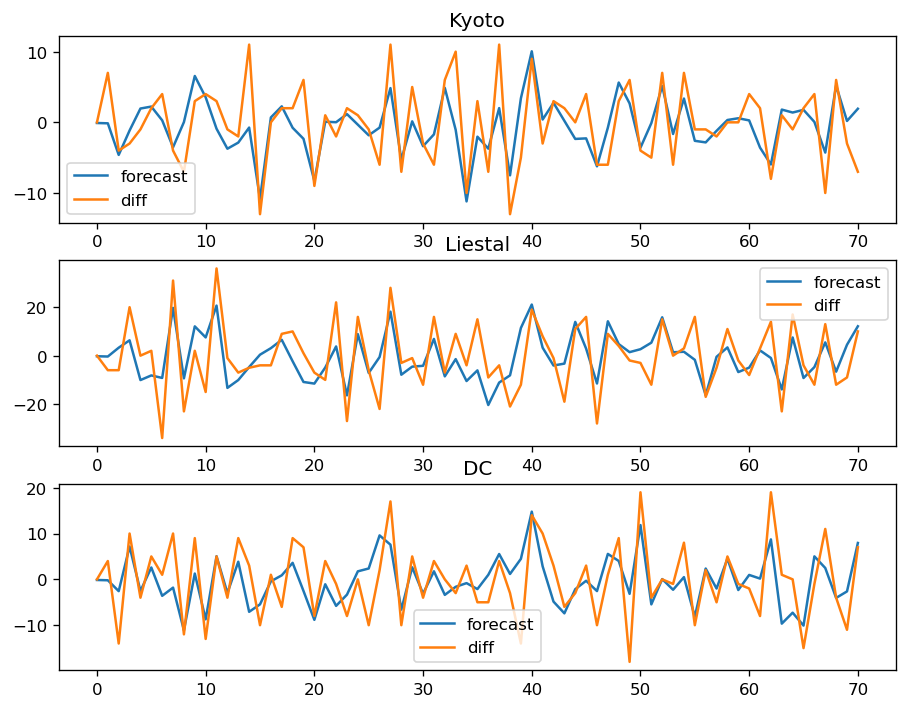

In [117]:
fig, axes = plt.subplots(3, 1)

model_fit.plot_predict(dynamic=False, ax=axes[0]);
model_fit2.plot_predict(dynamic=False, ax=axes[1]);
model_fit3.plot_predict(dynamic=False, ax=axes[2]);
axes[0].set_title('Kyoto')
axes[1].set_title('Liestal')
axes[2].set_title('DC')

### Change

In [128]:
model1 = ARIMA(kyoto['change'], order=(2,0,2))
model_fit = model1.fit()
print(model_fit.summary())
model2 = ARIMA(liestal['change'], order=(2,0,2))
model_fit2 = model2.fit()
print(model_fit2.summary())
model3 = ARIMA(dc['change'], order=(2,0,2))
model_fit3 = model3.fit()
print(model_fit3.summary())

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp

                              ARMA Model Results                              
Dep. Variable:                 change   No. Observations:                   71
Model:                     ARMA(2, 2)   Log Likelihood                 123.901
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sat, 19 Feb 2022   AIC                           -235.802
Time:                        15:02:59   BIC                           -222.226
Sample:                             0   HQIC                          -230.404
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0008      0.000      3.517      0.000       0.000       0.001
ar.L1.change    -0.5699      0.476     -1.196      0.232      -1.504       0.364
ar.L2.change    -0.0821      0.134     -0.61

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                              ARMA Model Results                              
Dep. Variable:                 change   No. Observations:                   71
Model:                     ARMA(2, 2)   Log Likelihood                  53.180
Method:                       css-mle   S.D. of innovations              0.113
Date:                Sat, 19 Feb 2022   AIC                            -94.360
Time:                        15:03:00   BIC                            -80.784
Sample:                             0   HQIC                           -88.961
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0085      0.002      4.943      0.000       0.005       0.012
ar.L1.change     0.3709      1.280      0.290      0.772      -2.137       2.879
ar.L2.change    -0.0844      0.152     -0.55

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                 change   No. Observations:                   71
Model:                     ARMA(2, 2)   Log Likelihood                  87.591
Method:                       css-mle   S.D. of innovations              0.069
Date:                Sat, 19 Feb 2022   AIC                           -163.183
Time:                        15:03:00   BIC                           -149.606
Sample:                             0   HQIC                          -157.784
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0025      0.001      4.851      0.000       0.001       0.003
ar.L1.change    -0.6896      0.138     -4.980      0.000      -0.961      -0.418
ar.L2.change     0.2565      0.118      2.17

Text(0.5, 1.0, 'DC')

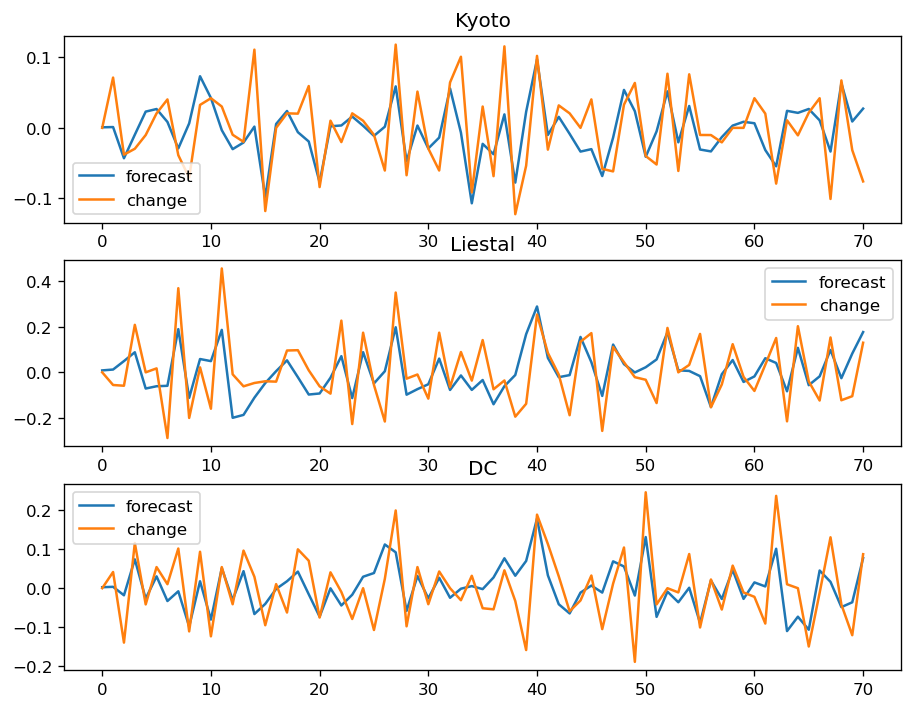

In [129]:
fig, axes = plt.subplots(3, 1)

model_fit.plot_predict(dynamic=False, ax=axes[0]);
model_fit2.plot_predict(dynamic=False, ax=axes[1]);
model_fit3.plot_predict(dynamic=False, ax=axes[2]);
axes[0].set_title('Kyoto')
axes[1].set_title('Liestal')
axes[2].set_title('DC')

### I want to see their performance on the last 15 years given they do not exist in the train dataset

In [134]:
value = kyoto.change
train = value[:-15]
test = value[-15:]

/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/leepark/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_param

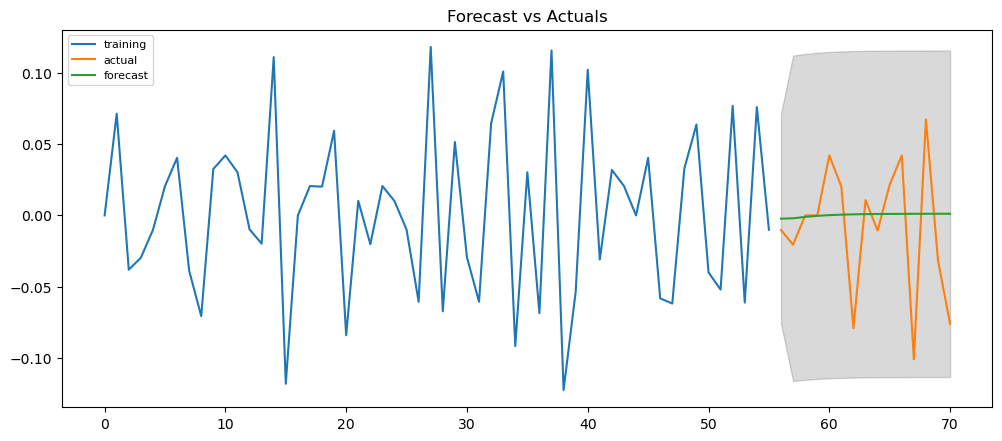

In [145]:
# Create Training and Test
value = kyoto.change
train = value[:-15]
test = value[-15:]
# Build Model
model = ARIMA(train, order=(2, 0, 2))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

It is interesting to see that the prediction doesn't really do well on predicting; it tells me that other information must be considered to predict the bloom doy.